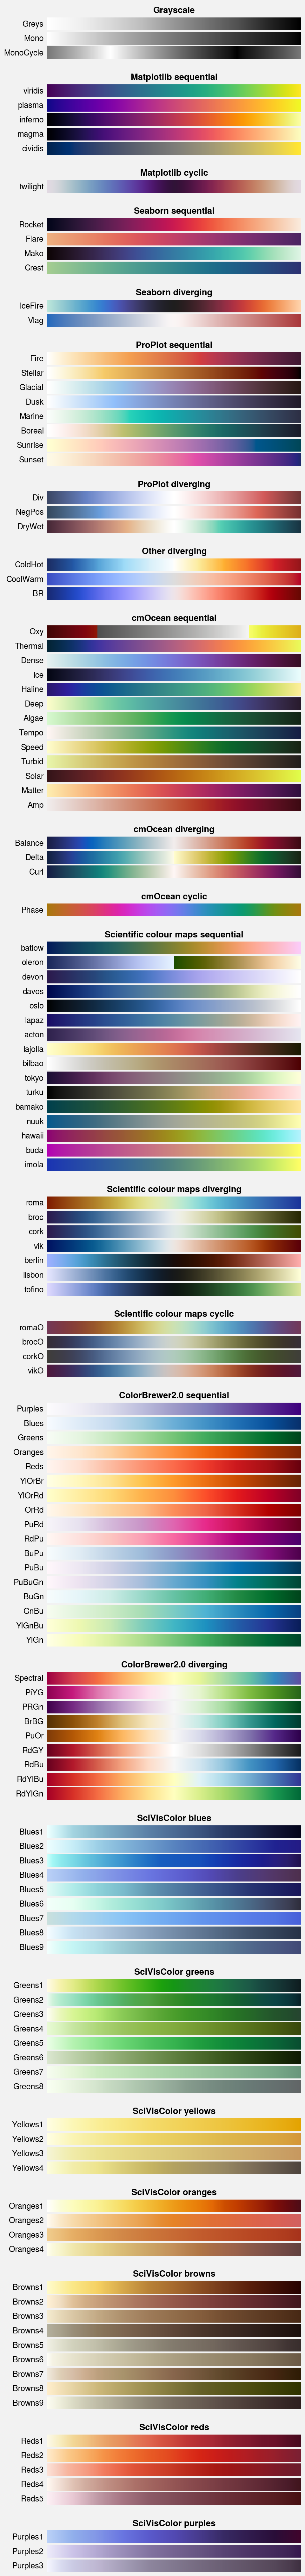

In [1]:
import proplot as pplt
fig, axs = pplt.show_cmaps()

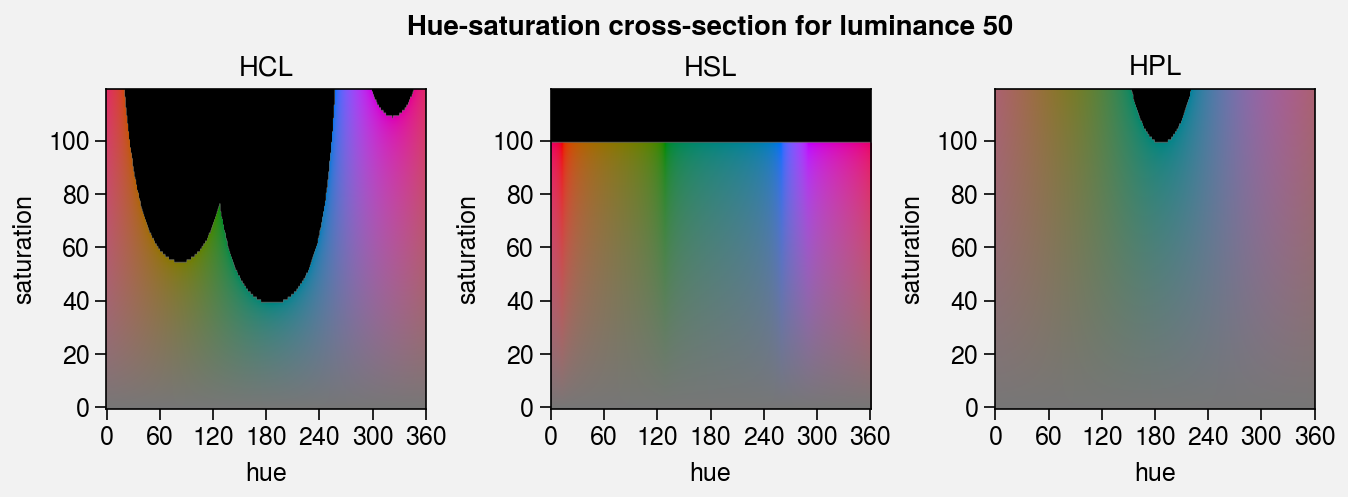

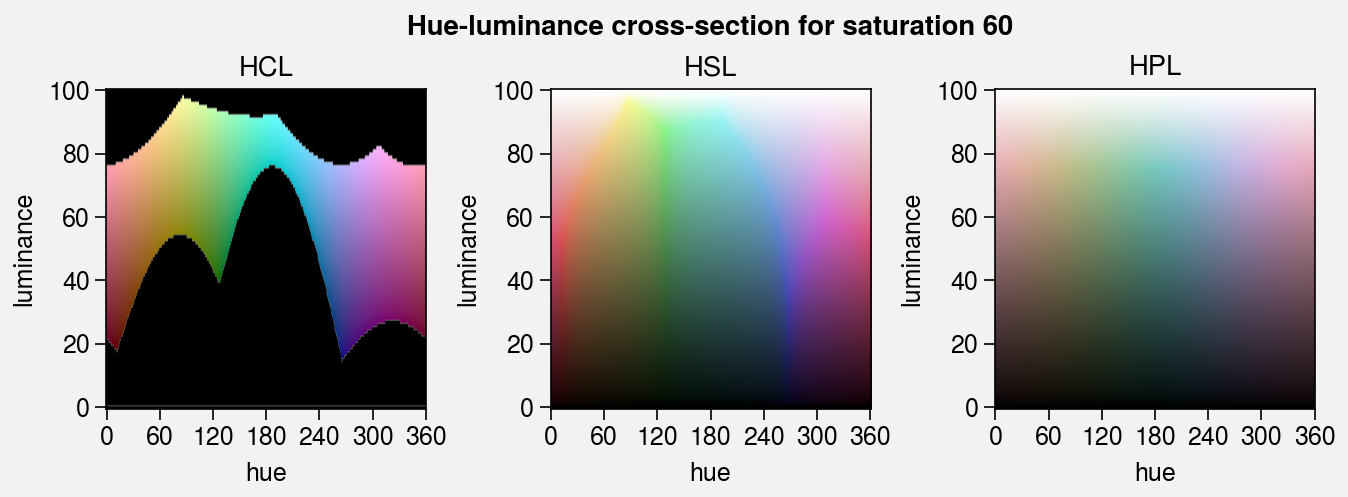

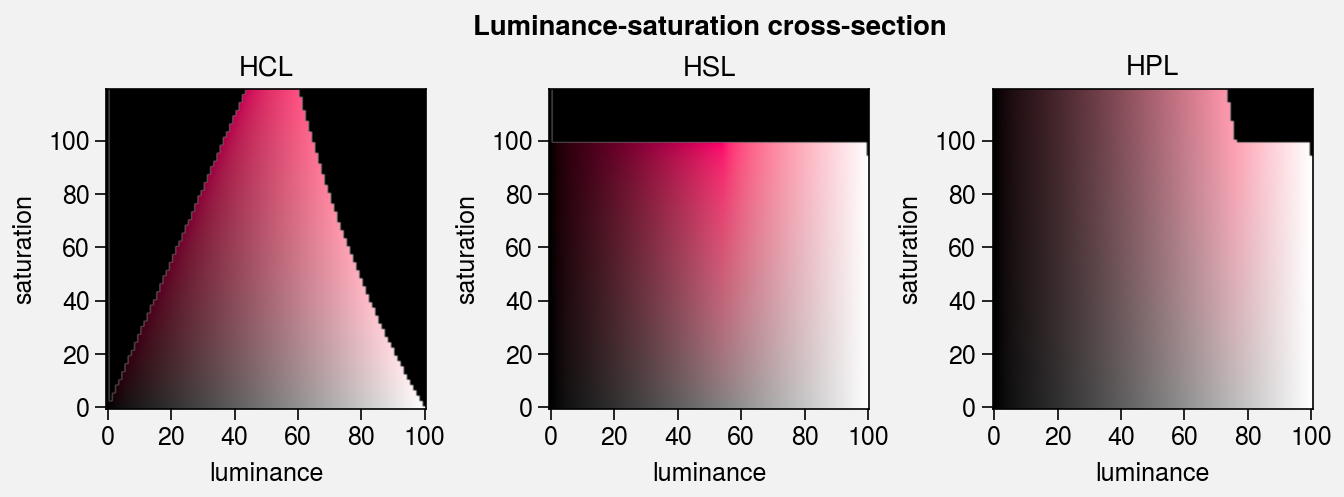

In [2]:
# Colorspace demo
import proplot as pplt
fig, axs = pplt.show_colorspaces(refwidth=1.6, luminance=50)
fig, axs = pplt.show_colorspaces(refwidth=1.6, saturation=60)
fig, axs = pplt.show_colorspaces(refwidth=1.6, hue=0)

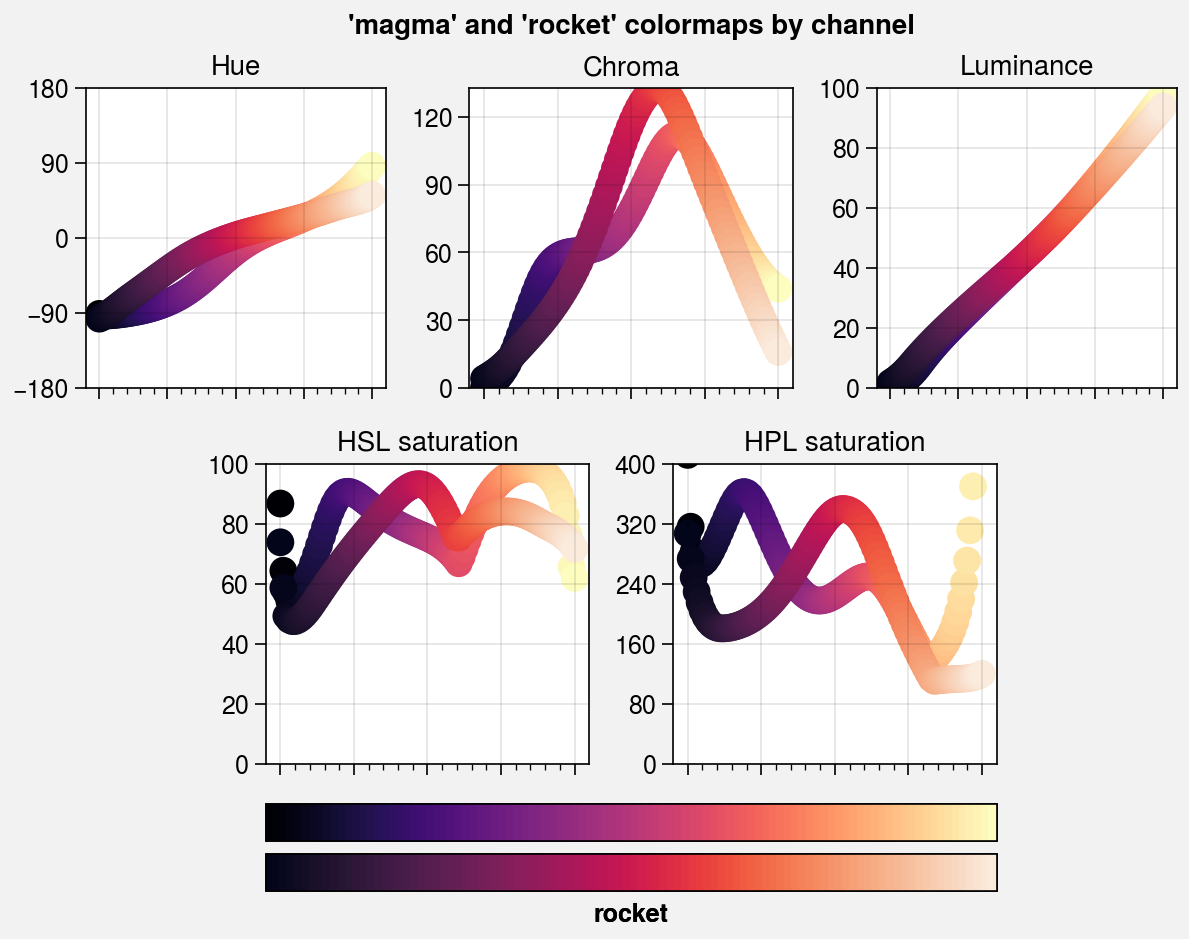

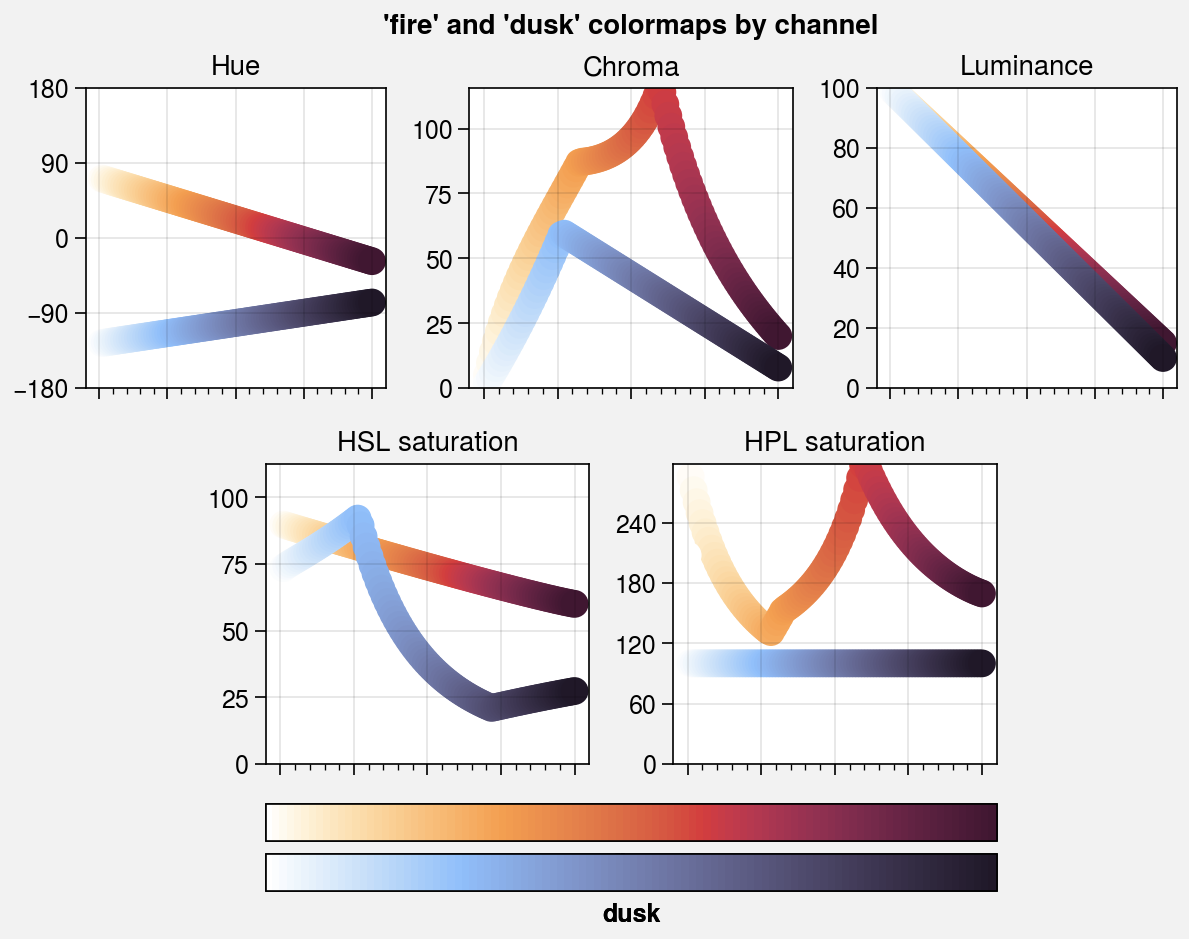

In [3]:
# Compare colormaps
import proplot as pplt
for cmaps in (('magma', 'rocket'), ('fire', 'dusk')):
    fig, axs = pplt.show_channels(
        *cmaps, refwidth=1.5, minhue=-180, maxsat=400, rgb=False
    )

In [4]:
# Sample data
import proplot as pplt
import numpy as np
state = np.random.RandomState(51423)
data = state.rand(30, 30).cumsum(axis=1)

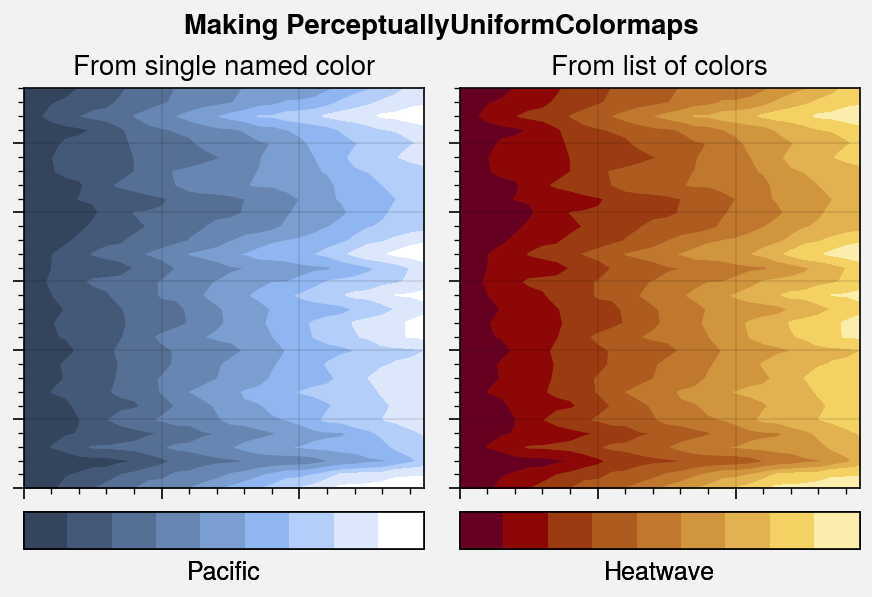

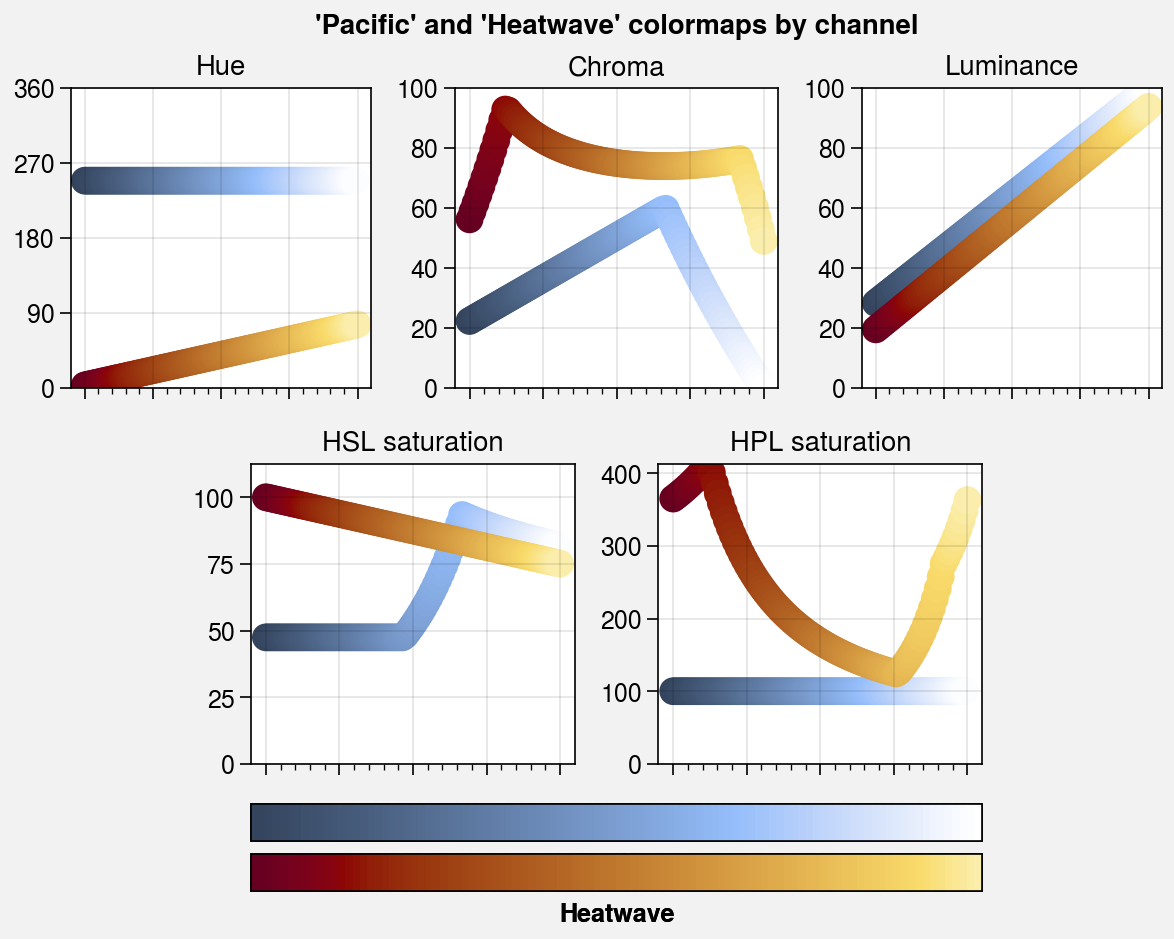

In [5]:
# Create figure
fig, axs = pplt.subplots(ncols=2, refwidth=2, span=0)
axs.format(
    xticklabels='none',
    yticklabels='none',
    suptitle='Making PerceptuallyUniformColormaps'
)

# Colormap from a color
# The trailing '_r' makes the colormap go dark-to-light instead of light-to-dark
cmap1 = pplt.Colormap('prussian blue_r', l=100, name='Pacific', space='hpl')
ax = axs[0]
ax.format(title='From single named color')
m = ax.contourf(data, cmap=cmap1)
ax.colorbar(m, loc='b', ticks='none', label=cmap1.name)

# Colormap from lists
cmap2 = pplt.Colormap(('maroon', 'light tan'), name='Heatwave')
ax = axs[1]
ax.format(title='From list of colors')
m = ax.contourf(data, cmap=cmap2)
ax.colorbar(m, loc='b', ticks='none', label=cmap2.name)

# Display the channels
fig, axs = pplt.show_channels(cmap1, cmap2, refwidth=1.5, rgb=False)

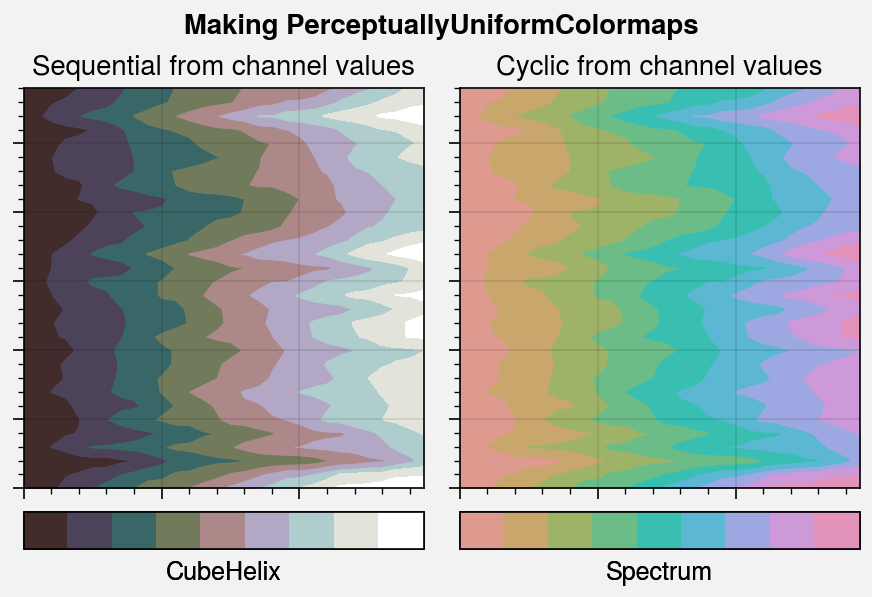

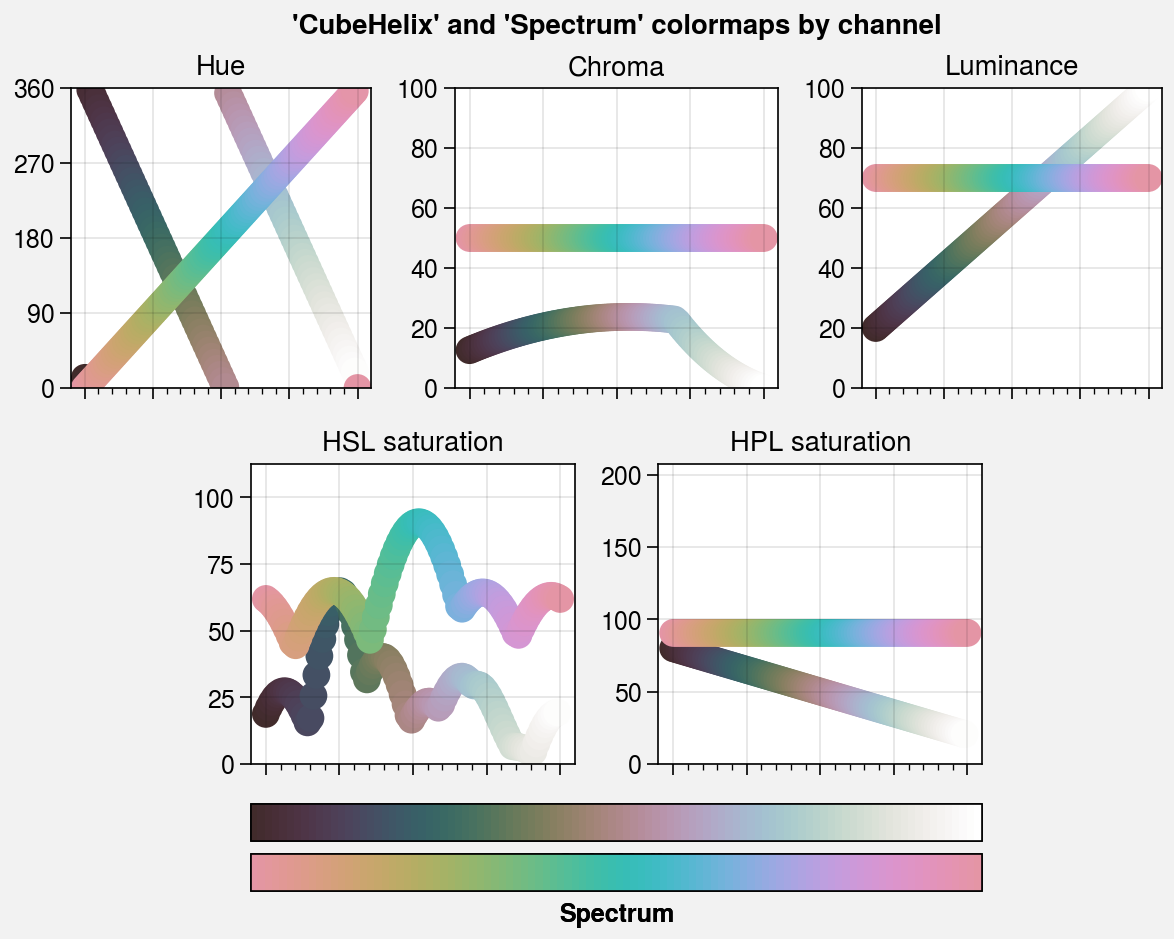

In [6]:
# Create figure
fig, axs = pplt.subplots(ncols=2, refwidth=2, span=0)
axs.format(
    xticklabels='none',
    yticklabels='none',
    suptitle='Making PerceptuallyUniformColormaps'
)

# Sequential colormap from channel values
cmap3 = pplt.Colormap(
    h=('red', 'red-720'), s=(80, 20), l=(20, 100), space='hpl', name='CubeHelix'
)
ax = axs[0]
ax.format(title='Sequential from channel values')
m = ax.contourf(data, cmap=cmap3)
ax.colorbar(m, loc='b', ticks='none', label=cmap3.name)

# Cyclic colormap from channel values
cmap4 = pplt.Colormap(
    h=(0, 360), c=50, l=70, space='hcl', cyclic=True, name='Spectrum'
)
ax = axs[1]
ax.format(title='Cyclic from channel values')
m = ax.contourf(data, cmap=cmap4)
ax.colorbar(m, loc='b', ticks='none', label=cmap4.name)

# Display the channels
fig, axs = pplt.show_channels(cmap3, cmap4, refwidth=1.5, rgb=False)

Saved colormap to '/home/runner/.proplot/cmaps/Diverging.json'.
Saved colormap to '/home/runner/.proplot/cmaps/SciVisColorEven.json'.
Saved colormap to '/home/runner/.proplot/cmaps/SciVisColorUneven.json'.


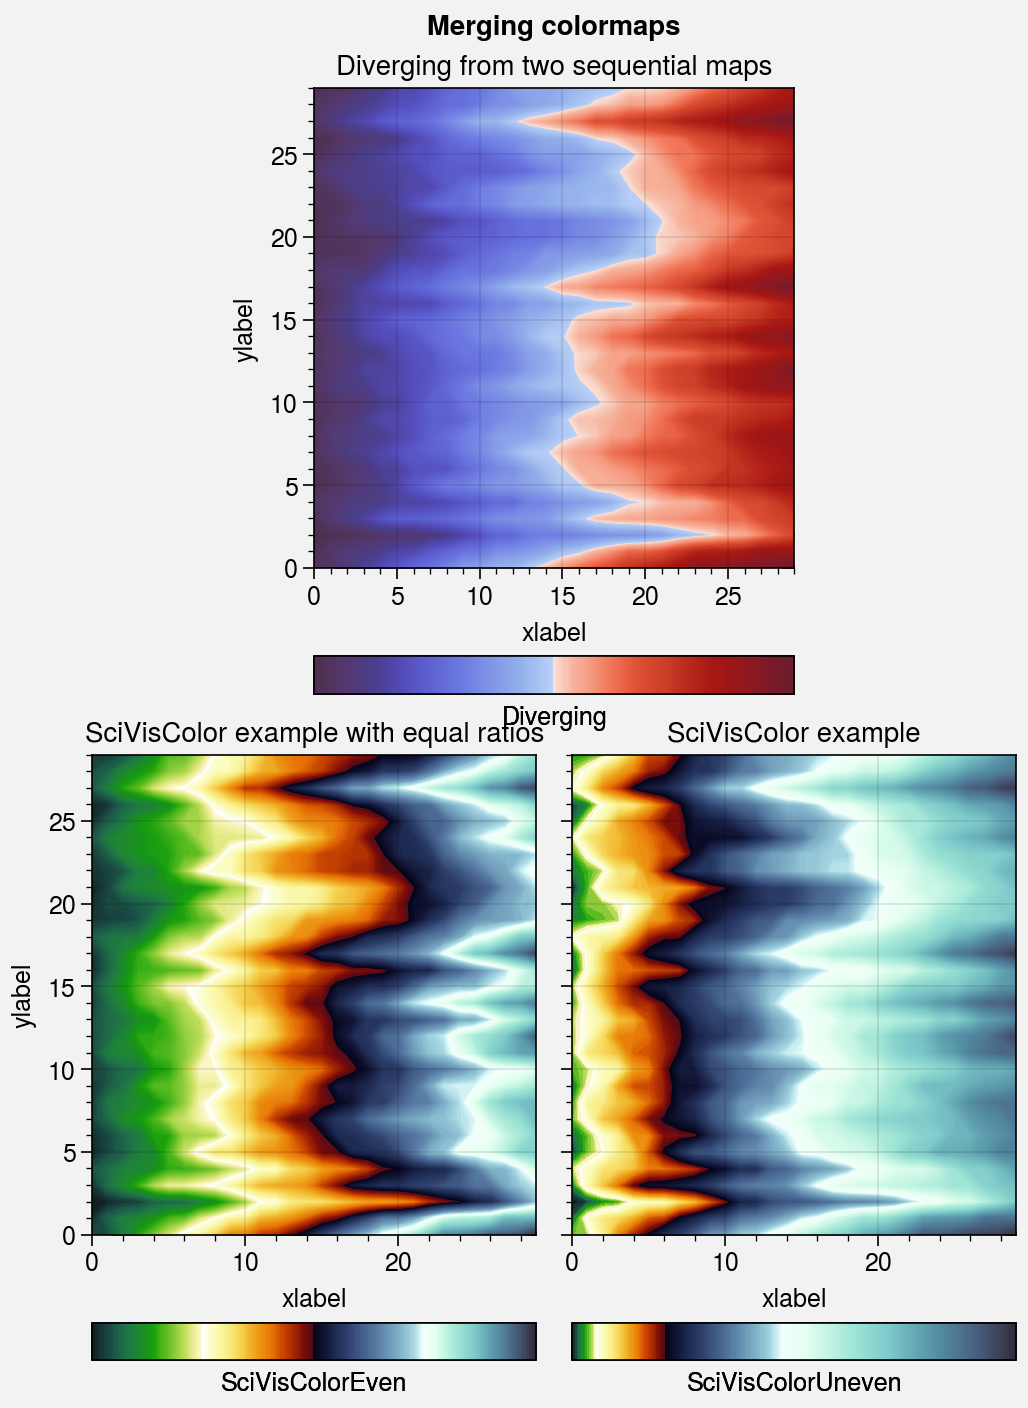

In [7]:
import proplot as pplt
import numpy as np
state = np.random.RandomState(51423)
data = state.rand(30, 30).cumsum(axis=1)

# Generate figure
fig, axs = pplt.subplots([[0, 1, 1, 0], [2, 2, 3, 3]], refwidth=2.4, span=False)
axs.format(
    xlabel='xlabel', ylabel='ylabel',
    suptitle='Merging colormaps'
)

# Diverging colormap example
title1 = 'Diverging from two sequential maps'
cmap1 = pplt.Colormap('Blues4_r', 'Reds3', name='Diverging', save=True)

# SciVisColor examples
title2 = 'SciVisColor example with equal ratios'
cmap2 = pplt.Colormap(
    'Greens1_r', 'Oranges1', 'Blues1_r', 'Blues6',
    name='SciVisColorEven', save=True
)
title3 = 'SciVisColor example'
cmap3 = pplt.Colormap(
    'Greens1_r', 'Oranges1', 'Blues1_r', 'Blues6',
    ratios=(1, 3, 5, 10), name='SciVisColorUneven', save=True
)

# Plot examples
for ax, cmap, title in zip(axs, (cmap1, cmap2, cmap3), (title1, title2, title3)):
    m = ax.contourf(data, cmap=cmap, levels=500)
    ax.colorbar(m, loc='b', locator='null', label=cmap.name)
    ax.format(title=title)

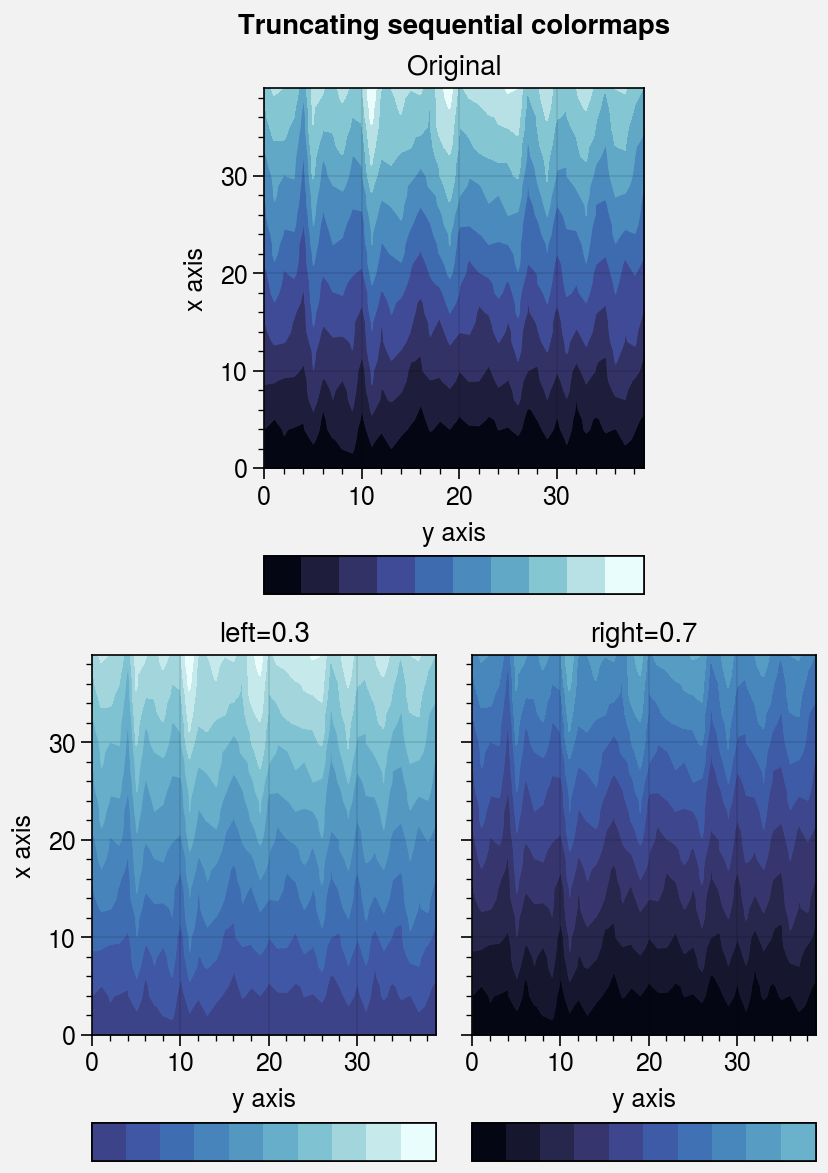

In [8]:
import proplot as pplt
import numpy as np
state = np.random.RandomState(51423)
data = state.rand(40, 40).cumsum(axis=0)

# Generate figure
fig, axs = pplt.subplots(
    [[0, 1, 1, 0], [2, 2, 3, 3]], refwidth=1.9, span=False,
)
axs.format(
    xlabel='y axis', ylabel='x axis',
    suptitle='Truncating sequential colormaps',
)

# Cutting left and right
cmap = 'Ice'
for ax, coord in zip(axs, (None, 0.3, 0.7)):
    if coord is None:
        title, cmap_kw = 'Original', {}
    elif coord < 0.5:
        title, cmap_kw = f'left={coord}', {'left': coord}
    else:
        title, cmap_kw = f'right={coord}', {'right': coord}
    ax.format(title=title)
    ax.contourf(
        data, cmap=cmap, cmap_kw=cmap_kw,
        colorbar='b', colorbar_kw={'locator': 'null'}
    )

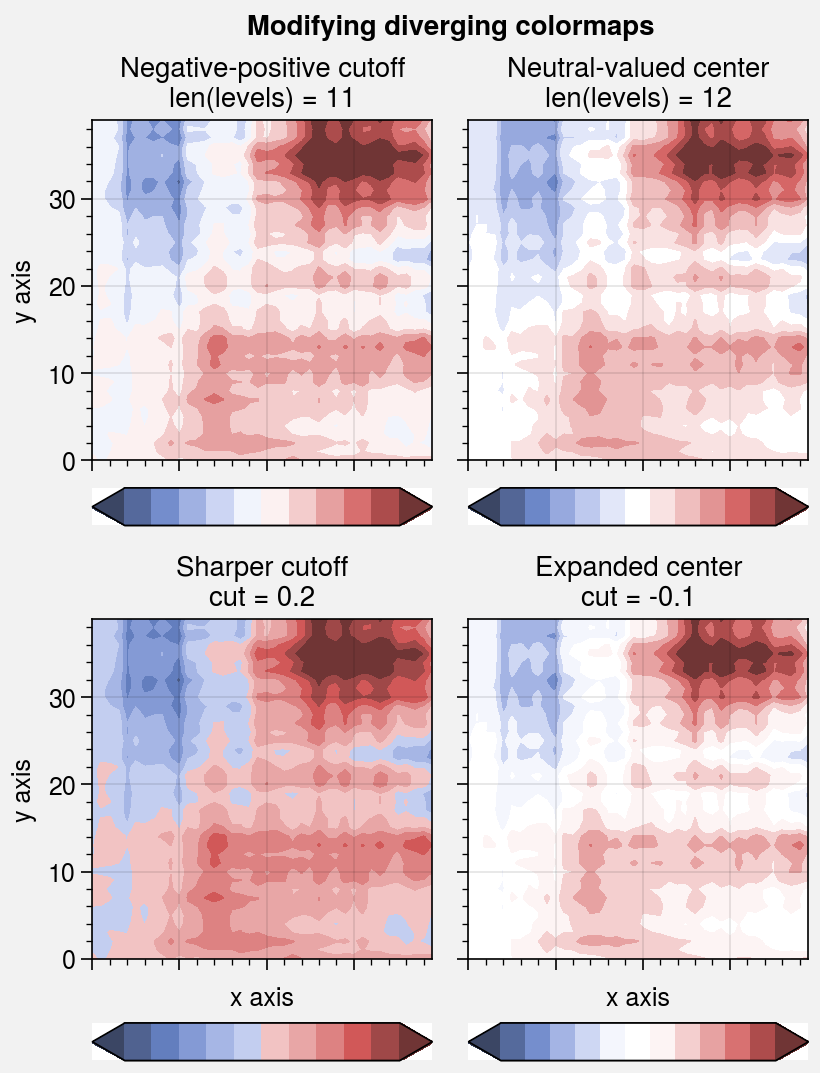

In [9]:
import proplot as pplt
import numpy as np
state = np.random.RandomState(51423)
data = (state.rand(40, 40) - 0.5).cumsum(axis=0).cumsum(axis=1)

# Create figure
fig, axs = pplt.subplots(ncols=2, nrows=2, refwidth=1.7, span=False)
axs.format(
    xlabel='x axis', ylabel='y axis', xticklabels='none',
    suptitle='Modifying diverging colormaps',
)

# Cutting out central colors
levels = pplt.arange(-10, 10, 2)
for i, (ax, cut) in enumerate(zip(axs, (None, None, 0.2, -0.1))):
    levels = pplt.arange(-10, 10, 2)
    if i == 1 or i == 3:
        levels = pplt.edges(levels)
    if i < 2:
        title = 'Negative-positive cutoff' if i == 0 else 'Neutral-valued center'
        title = f'{title}\nlen(levels) = {len(levels)}'
    else:
        title = 'Sharper cutoff' if cut > 0 else 'Expanded center'
        title = f'{title}\ncut = {cut}'
    ax.format(title=title)
    m = ax.contourf(
        data, cmap='Div', cmap_kw={'cut': cut},
        extend='both', levels=levels,
        colorbar='b', colorbar_kw={'locator': 'null'},
    )

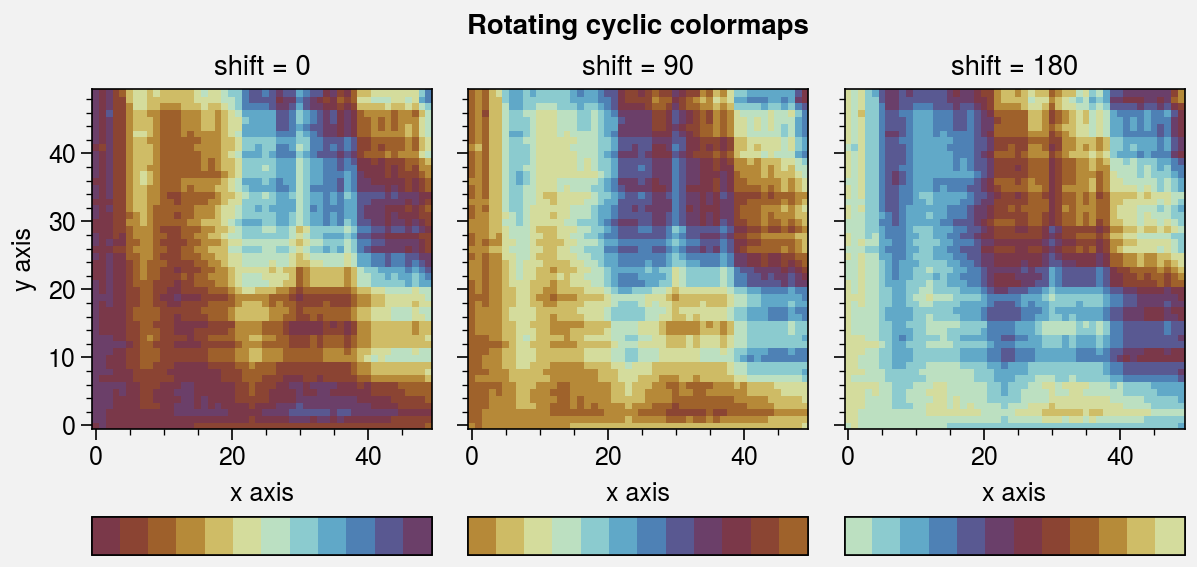

In [10]:
import proplot as pplt
import numpy as np
state = np.random.RandomState(51423)
data = (state.rand(50, 50) - 0.48).cumsum(axis=0).cumsum(axis=1) % 30

# Rotating cyclic colormaps
fig, axs = pplt.subplots(ncols=3, refwidth=1.7, span=False)
for ax, shift in zip(axs, (0, 90, 180)):
    m = ax.pcolormesh(data, cmap='romaO', cmap_kw={'shift': shift}, levels=12)
    ax.format(
        xlabel='x axis', ylabel='y axis', title=f'shift = {shift}',
        suptitle='Rotating cyclic colormaps'
    )
    ax.colorbar(m, loc='b', locator='null')

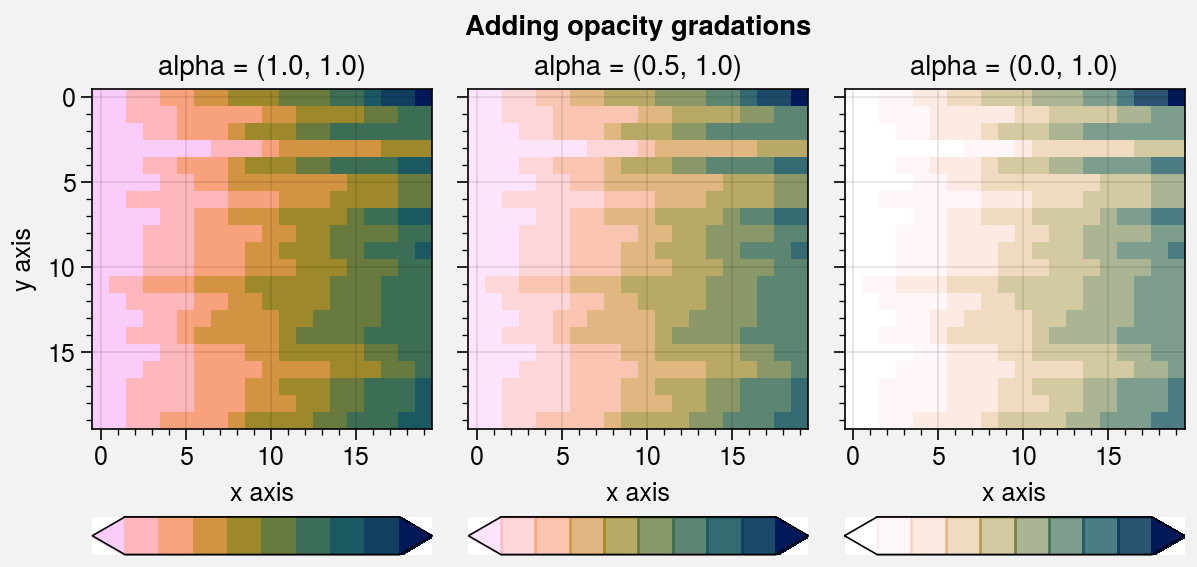

In [11]:
import proplot as pplt
import numpy as np
state = np.random.RandomState(51423)
data = state.rand(20, 20).cumsum(axis=1)

# Changing the colormap opacity
fig, axs = pplt.subplots(ncols=3, refwidth=1.7, span=False)
for ax, alpha in zip(axs, (1.0, 0.5, 0.0)):
    alpha = (alpha, 1.0)
    cmap = pplt.Colormap('batlow_r', alpha=alpha)
    m = ax.imshow(data, cmap=cmap, levels=10, extend='both')
    ax.colorbar(m, loc='b', locator='none')
    ax.format(
        title=f'alpha = {alpha}', xlabel='x axis', ylabel='y axis',
        suptitle='Adding opacity gradations'
    )

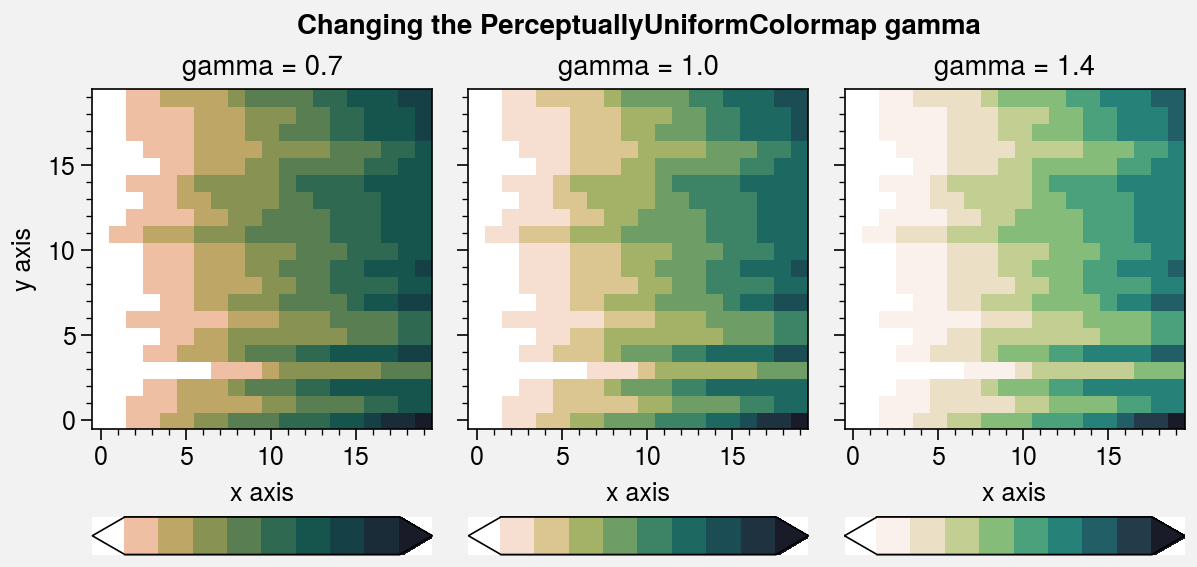

In [12]:
import proplot as pplt
import numpy as np
state = np.random.RandomState(51423)
data = state.rand(20, 20).cumsum(axis=1)

# Changing the colormap gamma
fig, axs = pplt.subplots(ncols=3, refwidth=1.7, span=False)
for ax, gamma in zip(axs, (0.7, 1.0, 1.4)):
    cmap = pplt.Colormap('boreal', gamma=gamma)
    m = ax.pcolormesh(data, cmap=cmap, levels=10, extend='both')
    ax.colorbar(m, loc='b', locator='none')
    ax.format(
        title=f'gamma = {gamma}', xlabel='x axis', ylabel='y axis',
        suptitle='Changing the PerceptuallyUniformColormap gamma'
    )